In [23]:
import imageio
import matplotlib.pyplot as plt
import IPython.display as dp
import numpy as np
import scipy.ndimage
import skimage
%matplotlib inline

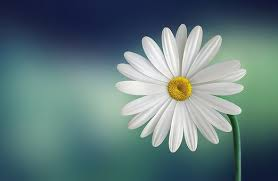

In [4]:
img="Desktop/flower.jpeg"
dp.Image(img)

In [8]:
src=imageio.imread(img)

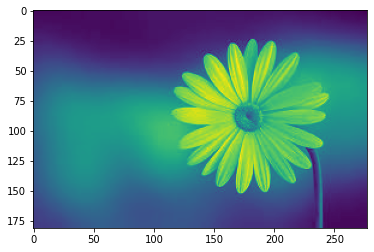

In [14]:
def grayscale(rgb):
    return np.dot(rgb[...,:3],[0.2989, 0.5870, 0.1140])
gray_img=grayscale(src)
plt.imshow(gray_img)

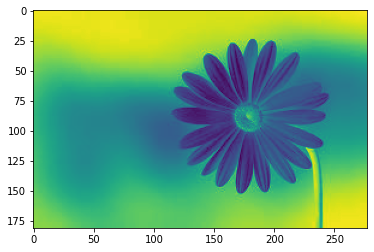

In [12]:
inv_img=(255-gray_img)
plt.imshow(inv_img)

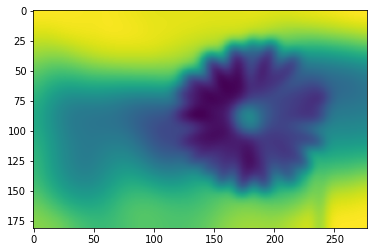

In [28]:
blurred=scipy.ndimage.filters.gaussian_filter(inv_img,sigma=5)
plt.imshow(blurred)

In [36]:
def dogding(blur,gry):
    dodge=blur*255/(255-gry)
    dodge[dodge>255]=255
    dodge[gry==255]=255
    return dodge.astype('uint8')

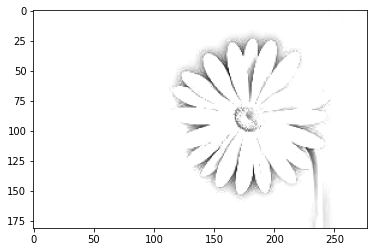

In [39]:
target_img=dogding(blurred,gray_img)
plt.imshow(target_img,cmap="gray")

In [40]:
import cv2

In [53]:
img=cv2.imread("Desktop/PM.jpeg")
gry_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
inv_img=(255-gry_img)
blurred=cv2.GaussianBlur(inv_img,(21,21),sigmaX=0,sigmaY=0)

In [54]:
def dodge(image,mask):
    return cv2.divide(image, 255-mask, scale=256)

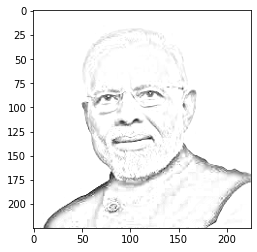

In [55]:
sketch=dodge(gry_img,blurred)
plt.imshow(sketch,cmap="gray")